1. Data Import

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

2. Data Loading and Exploration

In [7]:
# Load the dataset
df = pd.read_csv('diabetes_dataset.csv')

# Basic Data Exploration
print(f'Number of rows: {df.shape[0]}')

# Check Data Information
df.info()

# Check for missing values
print(f'Number of missing values: {df.isnull().sum()}')

# Check for duplicated rows
print(f'Number of duplicated rows: {df.duplicated().sum()}')

# Correlation between features
print("Correlation Matrix:")
print(df.corr())

Number of rows: 768
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Number of missing values: Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigr

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


3. Boxplots for Outliers

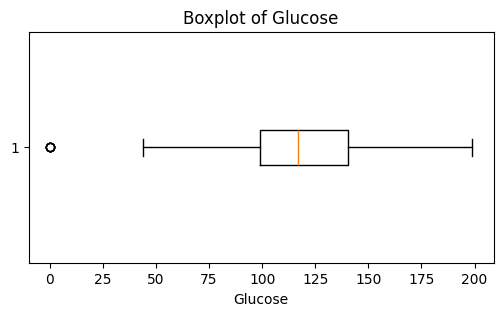

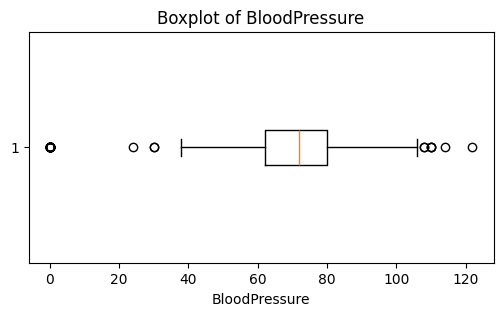

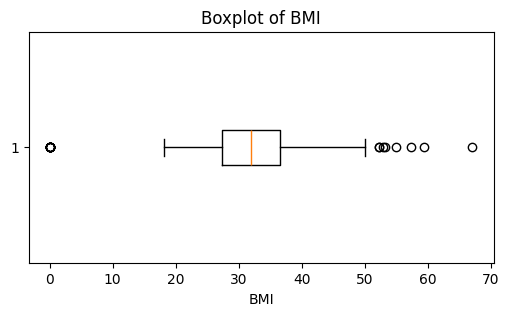

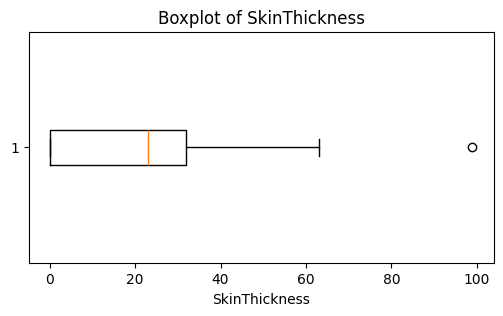

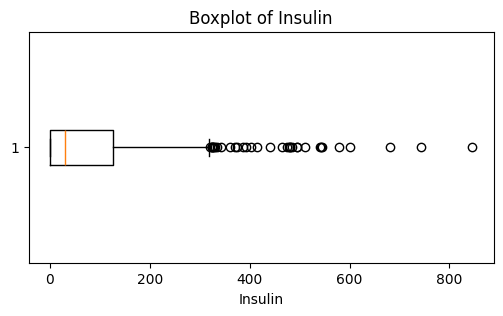

In [26]:
# Check for outliers
columns_to_check = ['Glucose', 'BloodPressure', 'BMI', 'SkinThickness', 'Insulin']
for col in columns_to_check:
    plt.figure(figsize=(6, 3))
    plt.boxplot(df[col], vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

4. Class Imbalance Check

In [10]:
# Check class distribution
print("\nTarget Class Distribution:")
print(df['Outcome'].value_counts())


Target Class Distribution:
Outcome
0    500
1    268
Name: count, dtype: int64


5. Data Preprocessing (Feature and Target Split)

In [11]:
# Split into features (X) and target (y)
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Output shapes
print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (768, 8)
Target (y) shape: (768,)


6. Train-Test Split

In [12]:
# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


7. Standard Scaling

In [13]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data, and transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the transformed training data
print("Scaled training data (first 5 rows):")
X_train_scaled[:5]

Scaled training data (first 5 rows):


array([[-0.52639686, -1.15139792, -3.75268255, -1.32277365, -0.70120553,
        -4.13525578, -0.49073479, -1.03594038],
       [ 1.58804586, -0.27664283,  0.68034485,  0.23350519, -0.70120553,
        -0.48916881,  2.41502991,  1.48710085],
       [-0.82846011,  0.56687102, -1.2658623 , -0.09071957,  0.01344832,
        -0.42452187,  0.54916055, -0.94893896],
       [-1.13052335,  1.2541786 , -1.04961706, -1.32277365, -0.70120553,
        -1.30372015, -0.63929127,  2.79212217],
       [ 0.68185612,  0.41066475,  0.57222224,  1.07648956,  2.48460077,
         1.83812075, -0.68682934,  1.13909516]])

LogisticRegression

In [14]:
# Initialize the Logistic Regression model
log_model = LogisticRegression()
# Train the model using scaled training data
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [15]:
# Make predictions
y_pred = log_model.predict(X_test_scaled)

# Evaluate performance
print("Accuracy on test set: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

# Confusion Matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, columns=['Predicted Negative', 'Predicted Positive'],
                               index=['Actual Negative', 'Actual Positive'])
print(conf_matrix_df)

# Classification Report
print("\nClassification Report:")
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df.to_string(float_format="%.2f"))

Accuracy on test set: 75.32%

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                  79                  20
Actual Positive                  18                  37

Classification Report:
              precision  recall  f1-score  support
0                  0.81    0.80      0.81    99.00
1                  0.65    0.67      0.66    55.00
accuracy           0.75    0.75      0.75     0.75
macro avg          0.73    0.74      0.73   154.00
weighted avg       0.76    0.75      0.75   154.00


Support Vector Machine

In [16]:
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

SVC()

In [17]:
# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)
# Accuracy score
print("SVM Accuracy on test set: {:.2f}%".format(accuracy_score(y_test, y_pred_svm) * 100))

SVM Accuracy on test set: 73.38%


DecisionTreeClassifier

In [18]:
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [19]:
# Make predictions
y_pred_dt = dt_model.predict(X_test_scaled)
# Accuracy score
print("Decision Tree Accuracy on test set: {:.2f}%".format(accuracy_score(y_test, y_pred_dt) * 100))

Decision Tree Accuracy on test set: 75.97%


8. Plotting Results

In [20]:
# Collect results from all models
models = ['Logistic Regression', 'SVM', 'Decision Tree']
accuracies = [
    accuracy_score(y_test, log_model.predict(X_test_scaled)),
    accuracy_score(y_test, svm_model.predict(X_test_scaled)),
    accuracy_score(y_test, dt_model.predict(X_test_scaled)),
]
recalls = [
    classification_report(y_test, log_model.predict(X_test_scaled), output_dict=True)['1']['recall'],
    classification_report(y_test, svm_model.predict(X_test_scaled), output_dict=True)['1']['recall'],
    classification_report(y_test, dt_model.predict(X_test_scaled), output_dict=True)['1']['recall'],
]
f_scores = [
    classification_report(y_test, log_model.predict(X_test_scaled), output_dict=True)['1']['f1-score'],
    classification_report(y_test, svm_model.predict(X_test_scaled), output_dict=True)['1']['f1-score'],
    classification_report(y_test, dt_model.predict(X_test_scaled), output_dict=True)['1']['f1-score'],
]
precisions = [
    classification_report(y_test, log_model.predict(X_test_scaled), output_dict=True)['1']['precision'],
    classification_report(y_test, svm_model.predict(X_test_scaled), output_dict=True)['1']['precision'],
    classification_report(y_test, dt_model.predict(X_test_scaled), output_dict=True)['1']['precision'],
]

# Store results in a DataFrame for final review
final_results = pd.DataFrame({
    'Algorithm': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f_scores

})
# Display the final results
final_results

,Algorithm,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.753247,0.649123,0.672727,0.660714
1,SVM,0.733766,0.645833,0.563636,0.601942
2,Decision Tree,0.759740,0.680000,0.618182,0.647619


9. Plot Each Performance Metric Separately

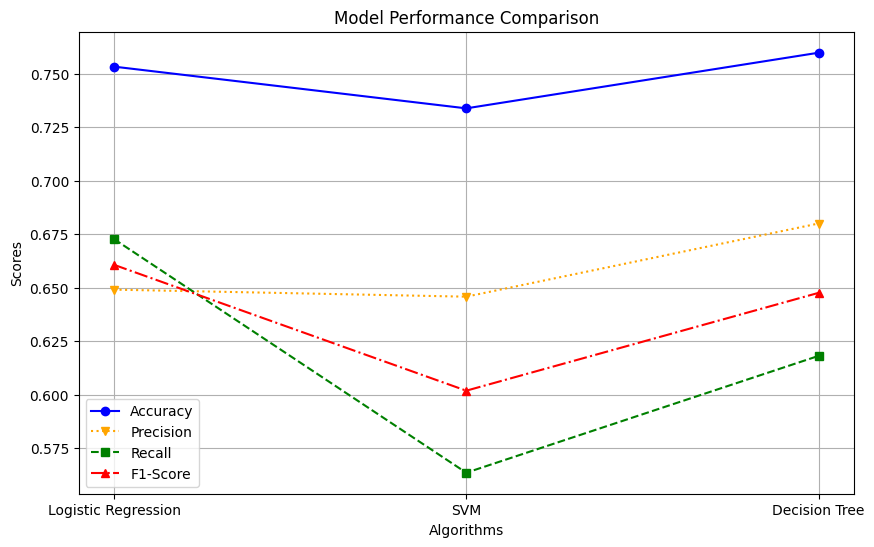

In [21]:
plt.figure(figsize=(10, 6))$$
plt.plot(models, accuracies, label='Accuracy', marker='o', linestyle='-', color='b')
plt.plot(models, precisions, label='Precision', marker='v', linestyle=':', color='orange')
plt.plot(models, recalls, label='Recall', marker='s', linestyle='--', color='green')
plt.plot(models, f_scores, label='F1-Score', marker='^', linestyle='-.', color='red')

plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.legend()
plt.grid(True)
plt.show()

10. AUC Evaluation:

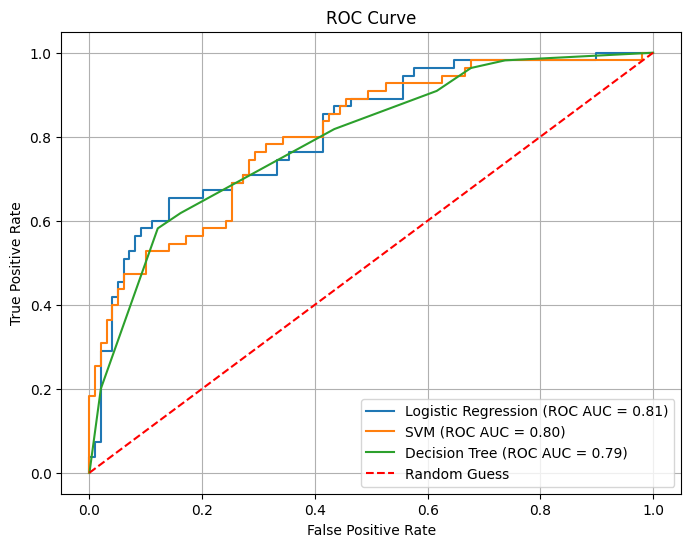

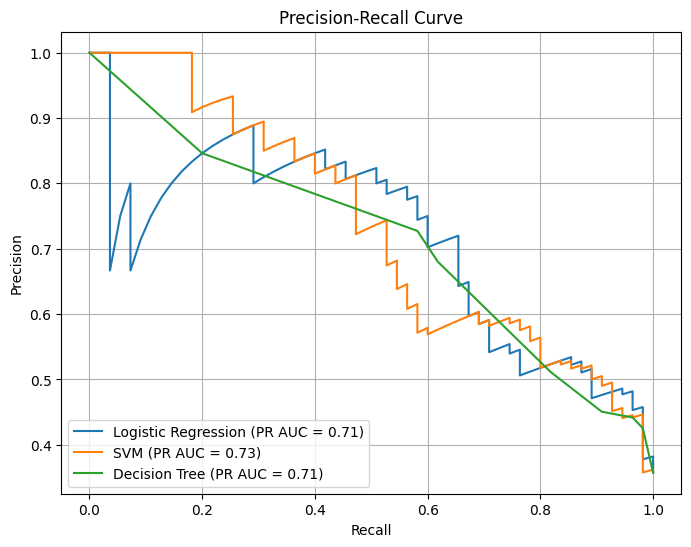

In [22]:
# Function to compute AUC metrics
def compute_auc(model, X_test, y_test, use_prob=True):
    """
    Computes ROC AUC and PR AUC metrics.
    - model: Trained model.
    - X_test: Test features.
    - y_test: Test labels.
    - use_prob: Whether to use predict_proba or decision_function.
    """
    if use_prob:
        y_scores = model.predict_proba(X_test)[:, 1]  # Use probabilities
    else:
        y_scores = model.decision_function(X_test)   # Use decision function

    # ROC AUC
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    # PR AUC
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    pr_auc = auc(recall, precision)

    return fpr, tpr, precision, recall, roc_auc, pr_auc

# Function to plot ROC curve
def plot_roc_curve(models, fprs, tprs, aucs, labels):
    plt.figure(figsize=(8, 6))
    for fpr, tpr, roc_auc, label in zip(fprs, tprs, aucs, labels):
        plt.plot(fpr, tpr, label=f'{label} (ROC AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Function to plot PR curve
def plot_pr_curve(models, precisions, recalls, aucs, labels):
    plt.figure(figsize=(8, 6))
    for precision, recall, pr_auc, label in zip(precisions, recalls, aucs, labels):
        plt.plot(recall, precision, label=f'{label} (PR AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.grid(True)
    plt.show()

# Compute AUC metrics for each model
fprs, tprs, precisions, recalls, roc_aucs, pr_aucs = [], [], [], [], [], []
labels = ['Logistic Regression', 'SVM', 'Decision Tree']

# Logistic Regression
fpr, tpr, precision, recall, roc_auc, pr_auc = compute_auc(log_model, X_test_scaled, y_test, use_prob=True)
fprs.append(fpr)
tprs.append(tpr)
precisions.append(precision)
recalls.append(recall)
roc_aucs.append(roc_auc)
pr_aucs.append(pr_auc)

# SVM
fpr, tpr, precision, recall, roc_auc, pr_auc = compute_auc(svm_model, X_test_scaled, y_test, use_prob=False)
fprs.append(fpr)
tprs.append(tpr)
precisions.append(precision)
recalls.append(recall)
roc_aucs.append(roc_auc)
pr_aucs.append(pr_auc)

# Decision Tree
fpr, tpr, precision, recall, roc_auc, pr_auc = compute_auc(dt_model, X_test_scaled, y_test, use_prob=True)
fprs.append(fpr)
tprs.append(tpr)
precisions.append(precision)
recalls.append(recall)
roc_aucs.append(roc_auc)
pr_aucs.append(pr_auc)

# Plot ROC and PR curves
plot_roc_curve(models=fprs, fprs=fprs, tprs=tprs, aucs=roc_aucs, labels=labels)
plot_pr_curve(models=precisions, precisions=precisions, recalls=recalls, aucs=pr_aucs, labels=labels)



In [23]:
prediction_data = [[3, 117, 72, 23, 30.5, 32, 0.3725, 29]]

# Create a DataFrame with column names matching your dataset
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
prediction_df = pd.DataFrame(prediction_data, columns=columns)

# Apply the StandardScaler transformation
prediction_data_scaled = scaler.transform(prediction_df)

# Make predictions with all models
prediction1 = log_model.predict(prediction_data_scaled)
prediction2 = dt_model.predict(prediction_data_scaled)
prediction3 = svm_model.predict(prediction_data_scaled)

# Interpret the predictions for each model
if prediction1[0] == 0:
    print("Logistic Regression Prediction: The person is NOT diabetic.")
else:
    print("Logistic Regression Prediction: The person IS diabetic.")

if prediction2[0] == 0:
    print("Decision Tree Prediction: The person is NOT diabetic.")
else:
    print("Decision Tree Prediction: The person IS diabetic.")

if prediction3[0] == 0:
    print("SVM Prediction: The person is NOT diabetic.")
else:
    print("SVM Prediction: The person IS diabetic.")


Logistic Regression Prediction: The person is NOT diabetic.
Decision Tree Prediction: The person is NOT diabetic.
SVM Prediction: The person is NOT diabetic.


In [24]:
prediction_data = [[3, 117, 72, 23, 30.5, 32, 0.3725, 29]]
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
prediction_df = pd.DataFrame(prediction_data, columns=columns)
prediction_data_scaled = scaler.transform(prediction_df)
prediction1 = log_model.predict(prediction_data_scaled)
prediction2 = dt_model.predict(prediction_data_scaled)
prediction3 = svm_model.predict(prediction_data_scaled)
print("Logistic Regression Prediction:", "The person IS diabetic." if prediction1[0] == 1 else "The person is NOT diabetic.")
print("Decision Tree Prediction:", "The person IS diabetic." if prediction2[0] == 1 else "The person is NOT diabetic.")
print("SVM Prediction:", "The person IS diabetic." if prediction3[0] == 1 else "The person is NOT diabetic.")


Logistic Regression Prediction: The person is NOT diabetic.
Decision Tree Prediction: The person is NOT diabetic.
SVM Prediction: The person is NOT diabetic.
